In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [179]:
df_allianz = pd.read_csv('ALLIANZ_SEGUROS_SA_CSV.csv')
df_tokio = pd.read_csv('TOKIO_MARINE_SEGURADORA_SA_CSV.csv')
df_ipca_geral = pd.read_csv('IPCA_Geral_CSV.csv')
df_ipca_pecas = pd.read_csv('IPCA_ACESS_PECAS_CSV.csv')

In [180]:
l = []
for i in df_allianz.index:
    l.append('01/'+ str(df_allianz['Competência'][i])[4:] + '/' + str(df_allianz['Competência'][i])[:-2])
df_allianz['Mês'] = l
df_allianz.drop('Competência', axis=1, inplace=True)
l = []
for i in df_tokio.index:
    l.append('01/'+ str(df_tokio['Competência'][i])[4:] + '/' + str(df_tokio['Competência'][i])[:-2])
df_tokio['Mês'] = l
df_tokio.drop('Competência', axis=1, inplace=True)

In [181]:
df_allianz['Prêmio Direto'] = df_allianz['Prêmio Direto'].apply(lambda x: x.replace('.',''))
l = []
for i in df_allianz.index:
    b = df_allianz['Prêmio Direto'][i]
    b = b[:-3] + '.' + b[-3:]
    l.append(b)
df_allianz['Prêmio Direto'] = l
df_allianz['Prêmio Direto'] = df_allianz['Prêmio Direto'].astype(float)

df_allianz['Prêmio Ganho'] = df_allianz['Prêmio Ganho'].apply(lambda x: x.replace('.',''))
l = []
for i in df_allianz.index:
    b = df_allianz['Prêmio Ganho'][i]
    b = b[:-3] + '.' + b[-3:]
    l.append(b)
df_allianz['Prêmio Ganho'] = l
df_allianz['Prêmio Ganho'] = df_allianz['Prêmio Ganho'].astype(float)

df_allianz['Sinistro Ocorrido'] = df_allianz['Sinistro Ocorrido'].apply(lambda x: x.replace('.',''))
l = []
for i in df_allianz.index:
    b = df_allianz['Sinistro Ocorrido'][i]
    b = b[:-3] + '.' + b[-3:]
    l.append(b)
df_allianz['Sinistro Ocorrido'] = l
df_allianz['Sinistro Ocorrido'] = df_allianz['Sinistro Ocorrido'].astype(float)
df_allianz['Sinistralidade'] = df_allianz['Sinistralidade'].apply(lambda x: x.replace(',','.'))
df_allianz['Sinistralidade'] = df_allianz['Sinistralidade'].astype(float)

In [182]:
df_tokio['Prêmio Direto'] = df_tokio['Prêmio Direto'].apply(lambda x: x.replace('.',''))
l = []
for i in df_tokio.index:
    b = df_tokio['Prêmio Direto'][i]
    b = b[:-3] + '.' + b[-3:]
    l.append(b)
df_tokio['Prêmio Direto'] = l
df_tokio['Prêmio Direto'] = df_tokio['Prêmio Direto'].astype(float)

df_tokio['Prêmio Ganho'] = df_tokio['Prêmio Ganho'].apply(lambda x: x.replace('.',''))
l = []
for i in df_tokio.index:
    b = df_tokio['Prêmio Ganho'][i]
    b = b[:-3] + '.' + b[-3:]
    l.append(b)
df_tokio['Prêmio Ganho'] = l
df_tokio['Prêmio Ganho'] = df_tokio['Prêmio Ganho'].astype(float)

df_tokio['Sinistro Ocorrido'] = df_tokio['Sinistro Ocorrido'].apply(lambda x: x.replace('.',''))
l = []
for i in df_tokio.index:
    b = df_tokio['Sinistro Ocorrido'][i]
    b = b[:-3] + '.' + b[-3:]
    l.append(b)
df_tokio['Sinistro Ocorrido'] = l
df_tokio['Sinistro Ocorrido'] = df_tokio['Sinistro Ocorrido'].astype(float)
df_tokio['Sinistralidade'] = df_tokio['Sinistralidade'].apply(lambda x: x.replace(',','.'))
df_tokio['Sinistralidade'] = df_tokio['Sinistralidade'].astype(float)

In [183]:
l = []
for i in df_ipca_geral.index:
    if df_ipca_geral['Mes'][i][:-5] == 'janeiro':
        x = '01'
    elif df_ipca_geral['Mes'][i][:-5] == 'fevereiro':
        x = '02'
    elif df_ipca_geral['Mes'][i][:-5] == 'março':
        x = '03'
    elif df_ipca_geral['Mes'][i][:-5] == 'abril':
        x = '04'
    elif df_ipca_geral['Mes'][i][:-5] == 'maio':
        x = '05'
    elif df_ipca_geral['Mes'][i][:-5] == 'junho':
        x = '06'
    elif df_ipca_geral['Mes'][i][:-5] == 'julho':
        x = '07'
    elif df_ipca_geral['Mes'][i][:-5] == 'agosto':
        x = '08'
    elif df_ipca_geral['Mes'][i][:-5] == 'setembro':
        x = '09'
    elif df_ipca_geral['Mes'][i][:-5] == 'outubro':
        x = '10'
    elif df_ipca_geral['Mes'][i][:-5] == 'novembro':
        x = '11'
    elif df_ipca_geral['Mes'][i][:-5] == 'dezembro':
        x = '12'
    l.append('01/'+ x + '/' + df_ipca_geral['Mes'][i][-4:])
df_ipca_geral['Mês'] = l
df_ipca_geral.drop('Mes', axis=1, inplace=True)

l = []
for i in df_ipca_pecas.index:
    if df_ipca_pecas['Mes'][i][:-5] == 'janeiro':
        x = '01'
    elif df_ipca_pecas['Mes'][i][:-5] == 'fevereiro':
        x = '02'
    elif df_ipca_pecas['Mes'][i][:-5] == 'março':
        x = '03'
    elif df_ipca_pecas['Mes'][i][:-5] == 'abril':
        x = '04'
    elif df_ipca_pecas['Mes'][i][:-5] == 'maio':
        x = '05'
    elif df_ipca_pecas['Mes'][i][:-5] == 'junho':
        x = '06'
    elif df_ipca_pecas['Mes'][i][:-5] == 'julho':
        x = '07'
    elif df_ipca_pecas['Mes'][i][:-5] == 'agosto':
        x = '08'
    elif df_ipca_pecas['Mes'][i][:-5] == 'setembro':
        x = '09'
    elif df_ipca_pecas['Mes'][i][:-5] == 'outubro':
        x = '10'
    elif df_ipca_pecas['Mes'][i][:-5] == 'novembro':
        x = '11'
    elif df_ipca_pecas['Mes'][i][:-5] == 'dezembro':
        x = '12'
    l.append('01/'+ x + '/' + df_ipca_pecas['Mes'][i][-4:])
df_ipca_pecas['Mês'] = l
df_ipca_pecas.drop('Mes', axis=1, inplace=True)

In [185]:
df_allianz['Mês'] = pd.to_datetime(df_allianz['Mês'], format='%d/%m/%Y')
df_tokio['Mês'] = pd.to_datetime(df_tokio['Mês'], format='%d/%m/%Y')
df_ipca_geral['Mês'] = pd.to_datetime(df_ipca_geral['Mês'], format='%d/%m/%Y')
df_ipca_pecas['Mês'] = pd.to_datetime(df_ipca_pecas['Mês'], format='%d/%m/%Y')

In [186]:
df_allianz_comp1 = pd.merge(df_allianz,df_ipca_geral, on='Mês')
df_allianz_comp = pd.merge(df_allianz_comp1,df_ipca_pecas, on='Mês')
df_tokio_comp1 = pd.merge(df_tokio,df_ipca_geral, on='Mês')
df_tokio_comp = pd.merge(df_tokio_comp1,df_ipca_pecas, on='Mês')

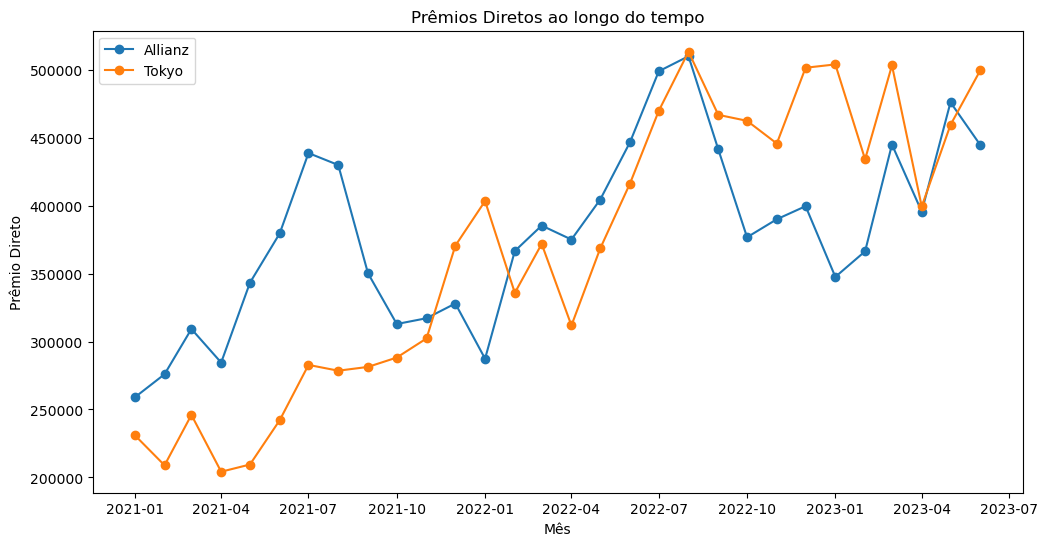

In [188]:
plt.figure(figsize=(12,6))
plt.plot(df_allianz_comp['Mês'],df_allianz_comp['Prêmio Direto'],label='Allianz',marker='o')
plt.plot(df_tokio_comp['Mês'],df_tokio_comp['Prêmio Direto'],label='Tokyo',marker='o')
plt.title('Prêmios Diretos ao longo do tempo')
plt.xlabel('Mês')
plt.ylabel('Prêmio Direto')
plt.legend()

Text(0, 0.5, 'Valor')

<Figure size 1200x600 with 0 Axes>

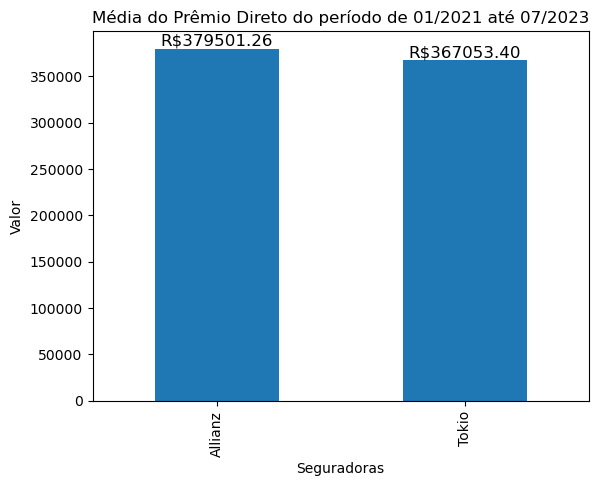

In [189]:
plt.figure(figsize=(12,6))
a = df_allianz_comp['Prêmio Direto'].mean()
b = df_tokio_comp['Prêmio Direto'].mean()
plot = {'Allianz':a,'Tokio' : b}
ax = pd.DataFrame(plot.values(),plot.keys(),['Seguradoras']).plot(kind='bar',legend=False)
ax.bar_label(ax.containers[0],fontsize=12,fmt='R$%1.2f')
plt.title('Média do Prêmio Direto do período de 01/2021 até 07/2023')
plt.xlabel('Seguradoras')
plt.ylabel('Valor')

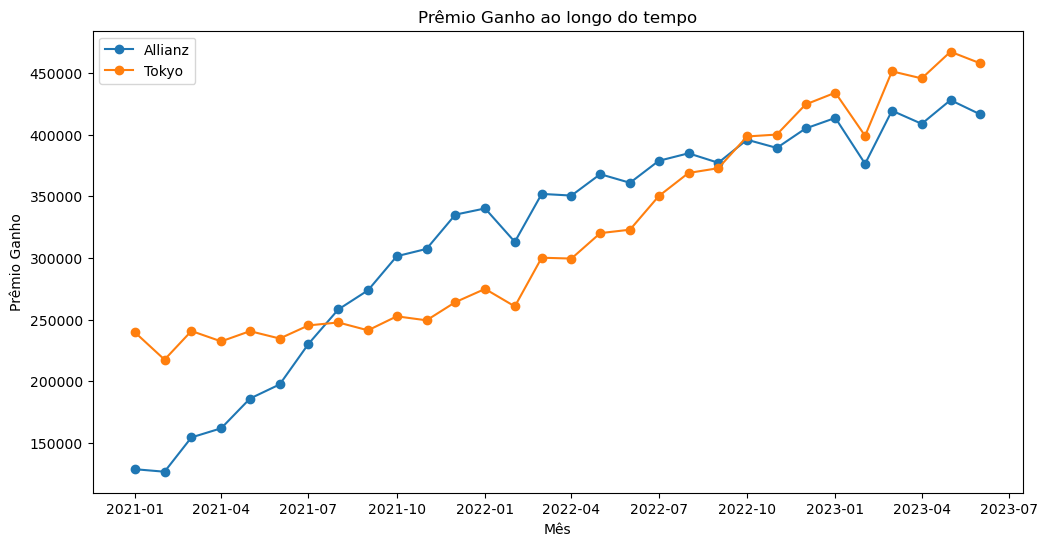

In [190]:
plt.figure(figsize=(12,6))
plt.plot(df_allianz_comp['Mês'],df_allianz_comp['Prêmio Ganho'],label='Allianz',marker='o')
plt.plot(df_tokio_comp['Mês'],df_tokio_comp['Prêmio Ganho'],label='Tokyo',marker='o')
plt.title('Prêmio Ganho ao longo do tempo')
plt.xlabel('Mês')
plt.ylabel('Prêmio Ganho')
plt.legend()

Text(0, 0.5, 'Valor')

<Figure size 1200x600 with 0 Axes>

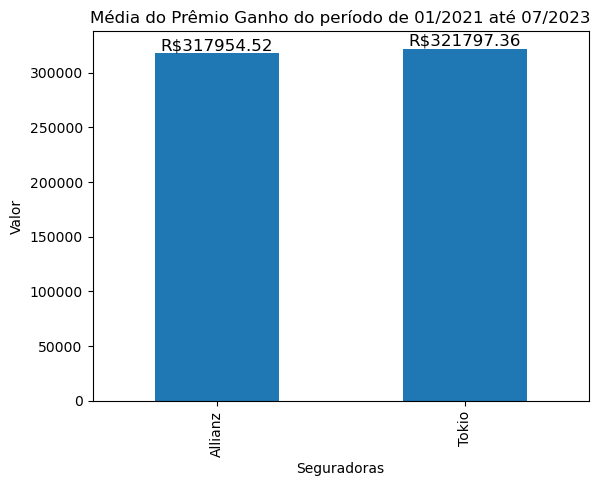

In [191]:
plt.figure(figsize=(12,6))
a = df_allianz_comp['Prêmio Ganho'].mean()
b = df_tokio_comp['Prêmio Ganho'].mean()
plot = {'Allianz':a,'Tokio' : b}
ax = pd.DataFrame(plot.values(),plot.keys(),['Seguradoras']).plot(kind='bar',legend=False)
ax.bar_label(ax.containers[0],fontsize=12,fmt='R$%1.2f')
plt.title('Média do Prêmio Ganho do período de 01/2021 até 07/2023')
plt.xlabel('Seguradoras')
plt.ylabel('Valor')

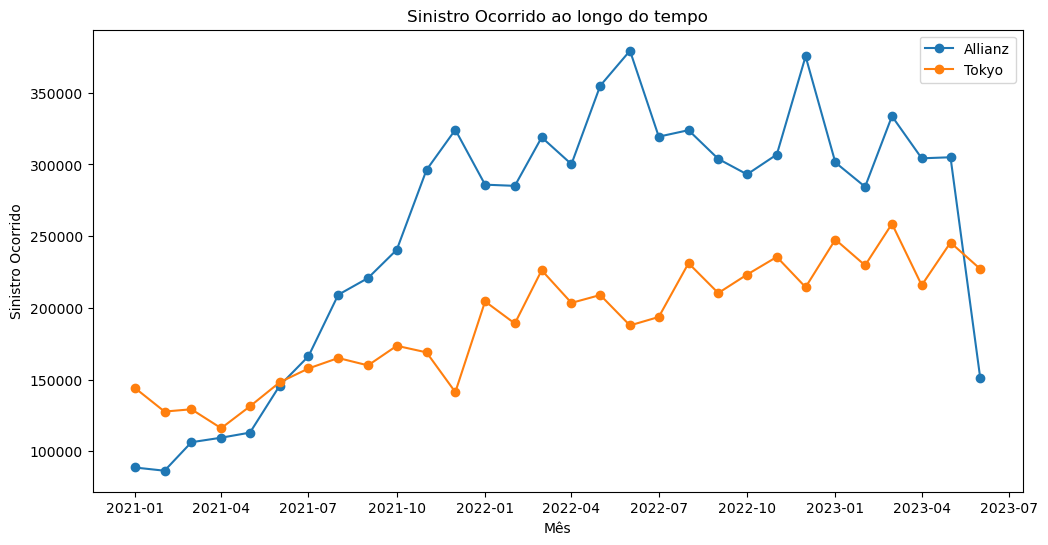

In [192]:
plt.figure(figsize=(12,6))
plt.plot(df_allianz_comp['Mês'],df_allianz_comp['Sinistro Ocorrido'],label='Allianz',marker='o')
plt.plot(df_tokio_comp['Mês'],df_tokio_comp['Sinistro Ocorrido'],label='Tokyo',marker='o')
plt.title('Sinistro Ocorrido ao longo do tempo')
plt.xlabel('Mês')
plt.ylabel('Sinistro Ocorrido')
plt.legend()

Text(0, 0.5, 'Valor')

<Figure size 1200x600 with 0 Axes>

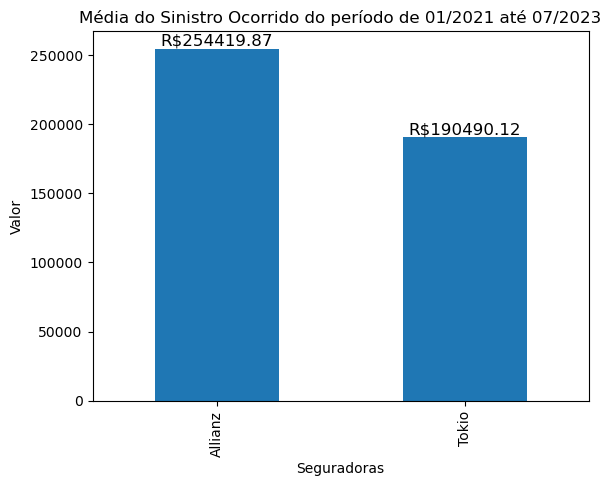

In [193]:
plt.figure(figsize=(12,6))
a = df_allianz_comp['Sinistro Ocorrido'].mean()
b = df_tokio_comp['Sinistro Ocorrido'].mean()
plot = {'Allianz':a,'Tokio' : b}
ax = pd.DataFrame(plot.values(),plot.keys(),['Seguradoras']).plot(kind='bar',legend=False)
ax.bar_label(ax.containers[0],fontsize=12,fmt='R$%1.2f')
plt.title('Média do Sinistro Ocorrido do período de 01/2021 até 07/2023')
plt.xlabel('Seguradoras')
plt.ylabel('Valor')

Text(0, 0.5, 'Valor')

<Figure size 1200x600 with 0 Axes>

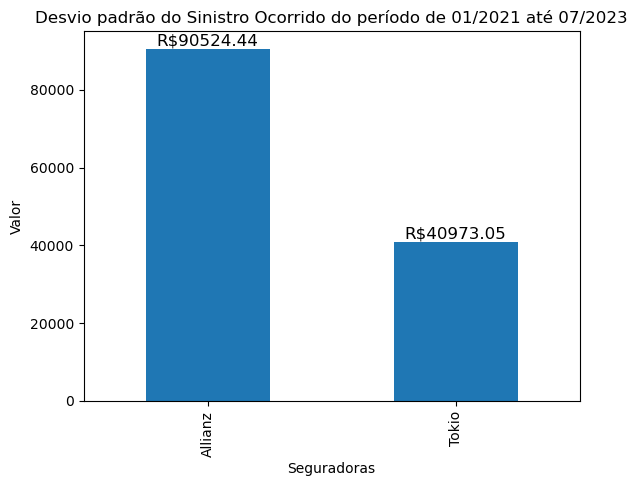

In [194]:
plt.figure(figsize=(12,6))
a = df_allianz_comp['Sinistro Ocorrido'].std()
b = df_tokio_comp['Sinistro Ocorrido'].std()
plot = {'Allianz':a,'Tokio' : b}
ax = pd.DataFrame(plot.values(),plot.keys(),['Seguradoras']).plot(kind='bar',legend=False)
ax.bar_label(ax.containers[0],fontsize=12,fmt='R$%1.2f')
plt.title('Desvio padrão do Sinistro Ocorrido do período de 01/2021 até 07/2023')
plt.xlabel('Seguradoras')
plt.ylabel('Valor')

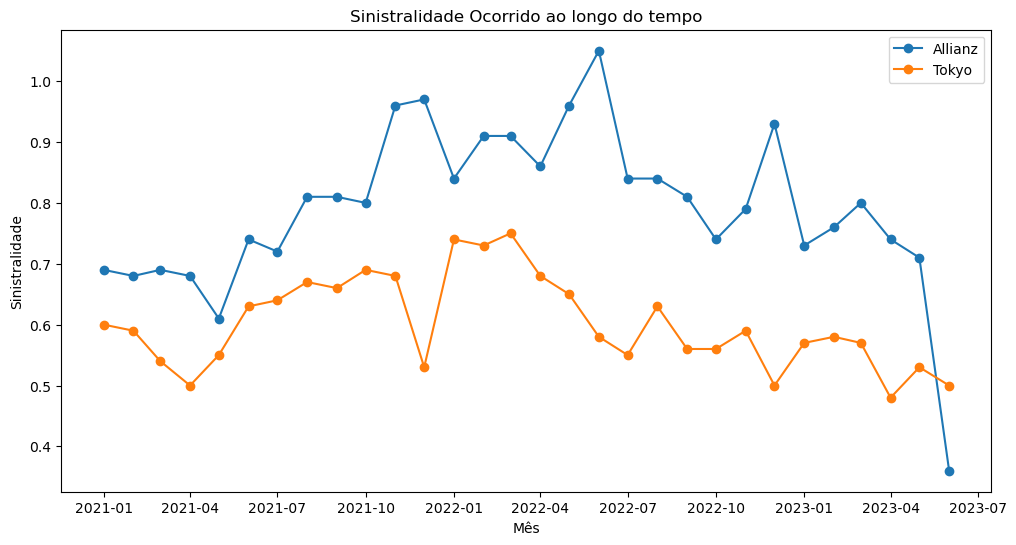

In [195]:
plt.figure(figsize=(12,6))
plt.plot(df_allianz_comp['Mês'],df_allianz_comp['Sinistralidade'],label='Allianz',marker='o')
plt.plot(df_tokio_comp['Mês'],df_tokio_comp['Sinistralidade'],label='Tokyo',marker='o')
plt.title('Sinistralidade Ocorrido ao longo do tempo')
plt.xlabel('Mês')
plt.ylabel('Sinistralidade')
plt.legend()

Text(0, 0.5, 'Valor')

<Figure size 1200x600 with 0 Axes>

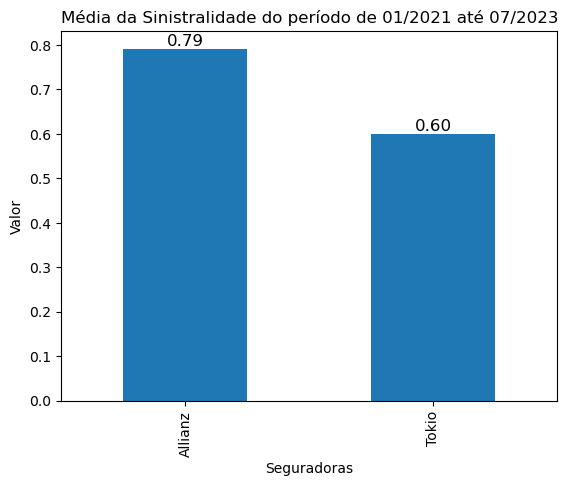

In [196]:
plt.figure(figsize=(12,6))
a = df_allianz_comp['Sinistralidade'].mean()
b = df_tokio_comp['Sinistralidade'].mean()
plot = {'Allianz':a,'Tokio' : b}
ax = pd.DataFrame(plot.values(),plot.keys(),['Seguradoras']).plot(kind='bar',legend=False)
ax.bar_label(ax.containers[0],fontsize=12,fmt='%1.2f')
plt.title('Média da Sinistralidade do período de 01/2021 até 07/2023')
plt.xlabel('Seguradoras')
plt.ylabel('Valor')

Text(0, 0.5, 'Valor')

<Figure size 1200x600 with 0 Axes>

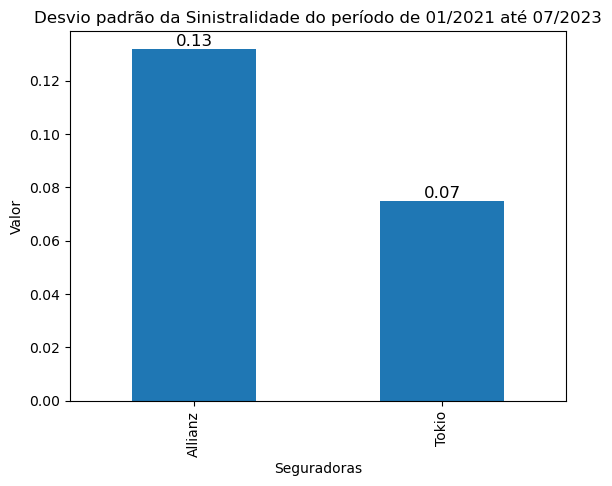

In [197]:
plt.figure(figsize=(12,6))
a = df_allianz_comp['Sinistralidade'].std()
b = df_tokio_comp['Sinistralidade'].std()
plot = {'Allianz':a,'Tokio' : b}
ax = pd.DataFrame(plot.values(),plot.keys(),['Seguradoras']).plot(kind='bar',legend=False)
ax.bar_label(ax.containers[0],fontsize=12,fmt='%1.2f')
plt.title('Desvio padrão da Sinistralidade do período de 01/2021 até 07/2023')
plt.xlabel('Seguradoras')
plt.ylabel('Valor')

In [200]:
df_allianz_comp

,Prêmio Direto,Prêmio Ganho,Sinistro Ocorrido,Sinistralidade,Mês,Valor_x,Valor_y
0,258921.958,128495.363,88642.191,0.69,2021-01-01,4.56,6.04
1,275927.116,126448.351,86389.051,0.68,2021-02-01,5.20,6.62
2,309220.559,154296.138,106265.897,0.69,2021-03-01,6.10,7.37
3,284513.585,161699.356,109419.489,0.68,2021-04-01,6.76,7.82
4,343268.818,185814.280,112961.807,0.61,2021-05-01,8.06,8.15
5,379533.126,197325.569,145759.905,0.74,2021-06-01,8.35,7.67
6,438671.705,230236.593,166256.426,0.72,2021-07-01,8.99,8.58
7,429880.101,258127.562,209103.614,0.81,2021-08-01,9.68,8.58
8,350212.410,273688.109,220753.201,0.81,2021-09-01,10.25,8.52
9,312882.904,301372.726,240496.711,0.80,2021-10-01,10.67,9.97


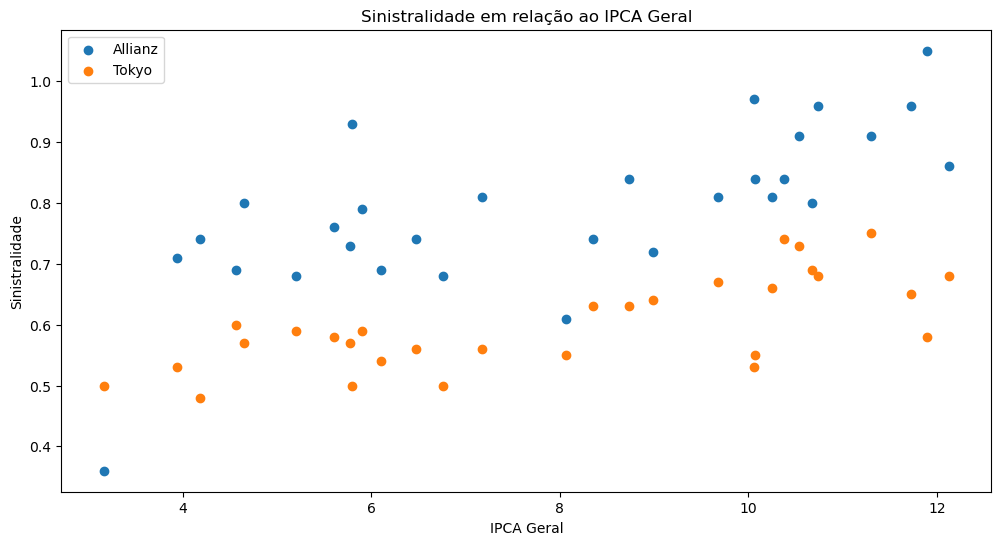

In [202]:
plt.figure(figsize=(12,6))
plt.scatter(df_allianz_comp['Valor_x'],df_allianz_comp['Sinistralidade'],
            label='Allianz',marker='o')
plt.scatter(df_tokio_comp['Valor_x'],df_tokio_comp['Sinistralidade'],
            label='Tokyo',marker='o')
plt.title('Sinistralidade em relação ao IPCA Geral')
plt.xlabel('IPCA Geral')
plt.ylabel('Sinistralidade')
plt.legend()

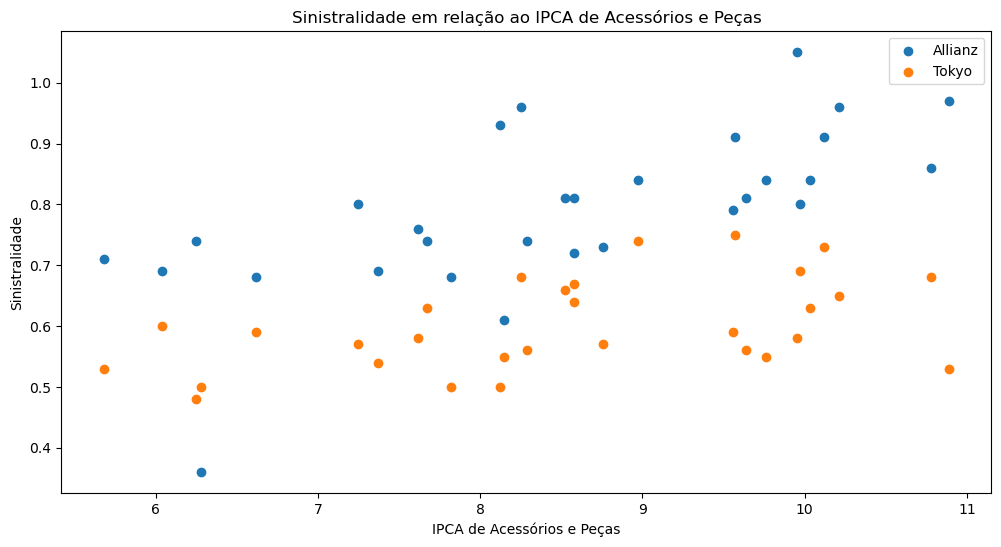

In [203]:
plt.figure(figsize=(12,6))
plt.scatter(df_allianz_comp['Valor_y'],df_allianz_comp['Sinistralidade'],
            label='Allianz',marker='o')
plt.scatter(df_tokio_comp['Valor_y'],df_tokio_comp['Sinistralidade'],
            label='Tokyo',marker='o')
plt.title('Sinistralidade em relação ao IPCA de Acessórios e Peças')
plt.xlabel('IPCA de Acessórios e Peças')
plt.ylabel('Sinistralidade')
plt.legend()

Text(0, 0.5, 'Valor')

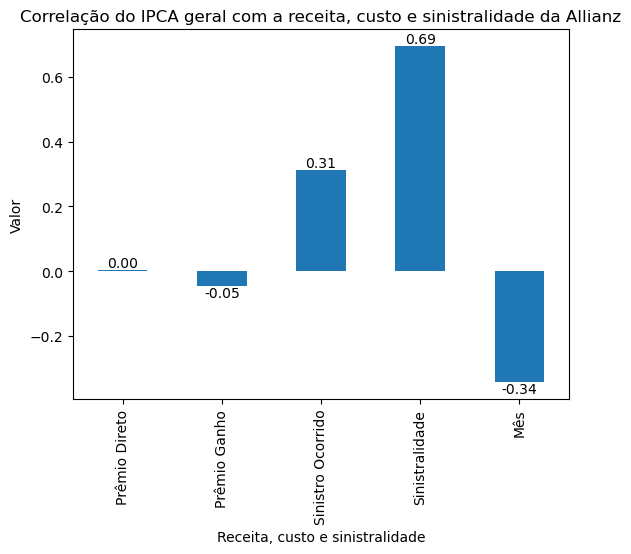

In [204]:
ax = df_allianz_comp.corr()['Valor_x'].drop(['Valor_x',
                                                       'Valor_y']).plot(kind='bar')
ax.bar_label(ax.containers[0],fmt='%1.2f')
plt.title('Correlação do IPCA geral com a receita, custo e sinistralidade da Allianz')
plt.xlabel('Receita, custo e sinistralidade')
plt.ylabel('Valor')


Text(0, 0.5, 'Valor')

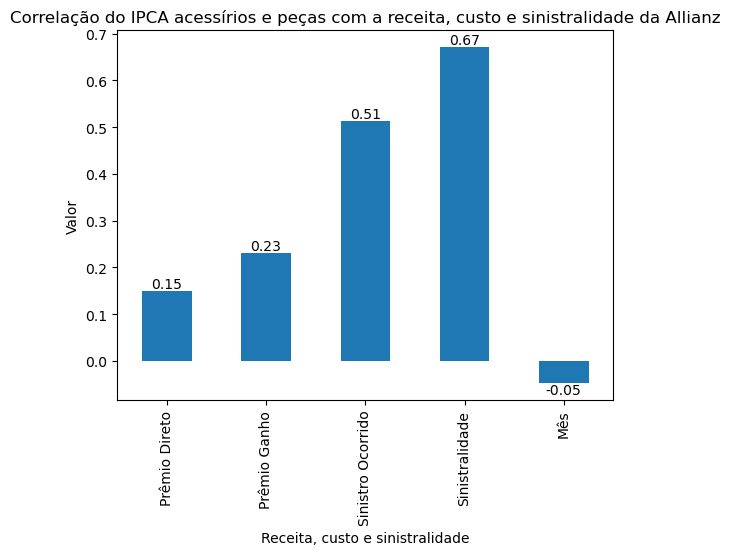

In [205]:
ax = df_allianz_comp.corr()['Valor_y'].drop(['Valor_x',
'Valor_y']).plot(kind='bar')
ax.bar_label(ax.containers[0],fmt='%1.2f')
plt.title('Correlação do IPCA acessírios e peças com a receita, custo e sinistralidade da Allianz')
plt.xlabel('Receita, custo e sinistralidade')
plt.ylabel('Valor')

Text(0, 0.5, 'Valor')

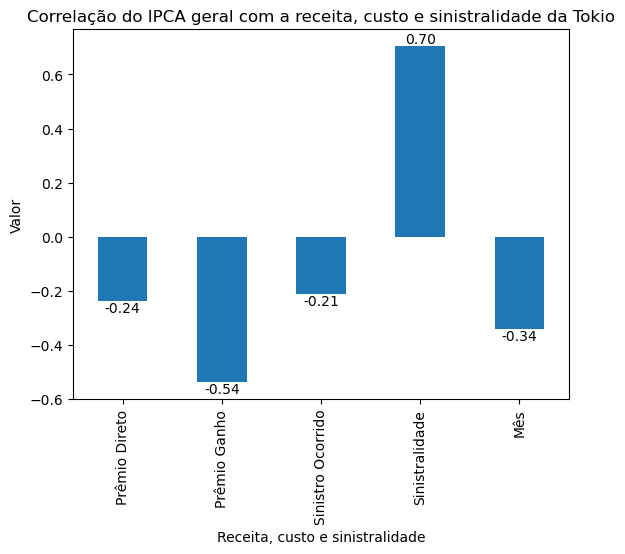

In [206]:
 ax = df_tokio_comp.corr()['Valor_x'].drop(['Valor_x',
'Valor_y']).plot(kind='bar')
ax.bar_label(ax.containers[0],fmt='%1.2f')
plt.title('Correlação do IPCA geral com a receita, custo e sinistralidade da Tokio')
plt.xlabel('Receita, custo e sinistralidade')
plt.ylabel('Valor')

Text(0, 0.5, 'Valor')

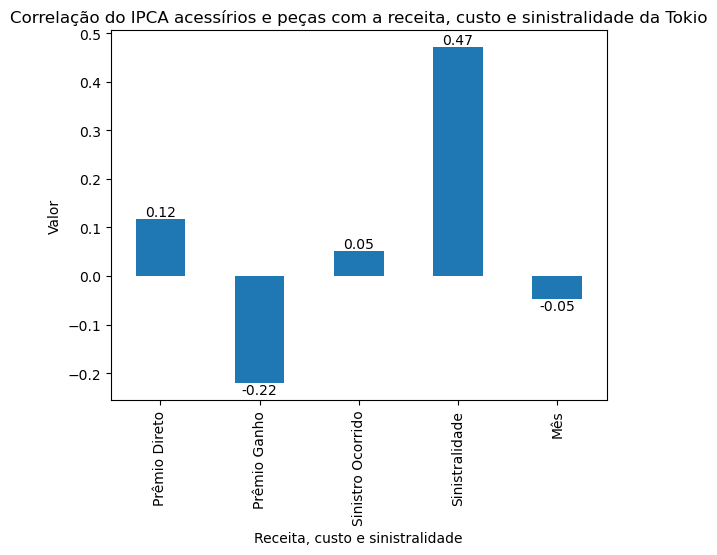

In [207]:
ax = df_tokio_comp.corr()['Valor_y'].drop(['Valor_x',
'Valor_y']).plot(kind='bar')
ax.bar_label(ax.containers[0],fmt='%1.2f')
plt.title('Correlação do IPCA acessírios e peças com a receita, custo e sinistralidade da Tokio')
plt.xlabel('Receita, custo e sinistralidade')
plt.ylabel('Valor')


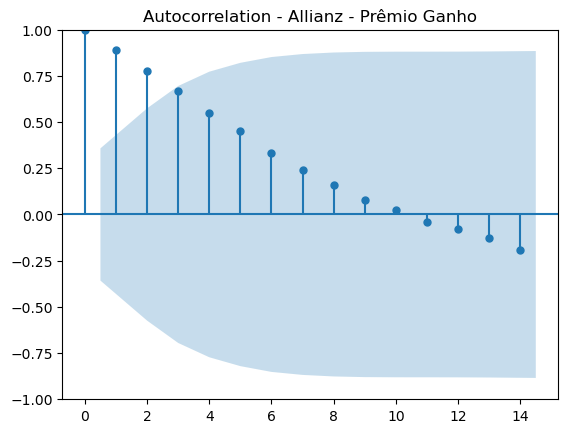

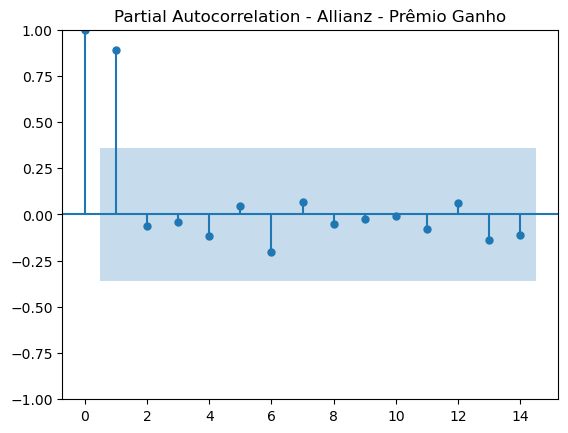

In [208]:
# Função para determinar a ordem p e q usando ACF e PACF
def find_order(data, target_col):
    acf_plot = plot_acf(data[target_col], lags=14,title='Autocorrelation - Allianz - Prêmio Ganho')
    pacf_plot = plot_pacf(data[target_col], lags=14,
    title='Partial Autocorrelation - Allianz - Prêmio Ganho')
find_order(df_allianz_comp, 'Prêmio Ganho')

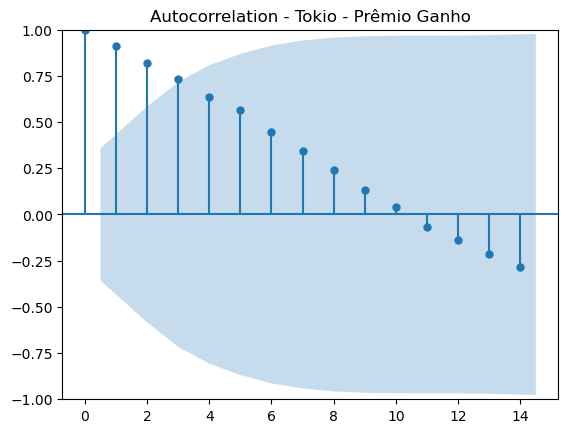

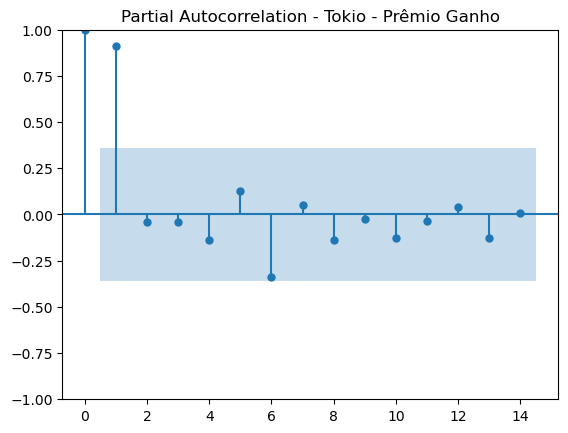

In [209]:
# Função para determinar a ordem p e q usando ACF e PACF
def find_order(data, target_col):
    acf_plot = plot_acf(data[target_col], lags=14,title='Autocorrelation - Tokio - Prêmio Ganho')
    pacf_plot = plot_pacf(data[target_col], lags=14,
    title='Partial Autocorrelation - Tokio - Prêmio Ganho')
find_order(df_tokio_comp, 'Prêmio Ganho')

In [210]:
def train_test_arima(data, target_col, p, d, q):
    train, test = train_test_split(data, test_size=0.2, shuffle=False)
    model = ARIMA(train[target_col], order=(p, d, q))
    fitted_model = model.fit()
    predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
    mse = mean_squared_error(test[target_col], predictions)
    return mse, test, predictions

C:\Users\R5564655\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\R5564655\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\R5564655\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\R5564655\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("M

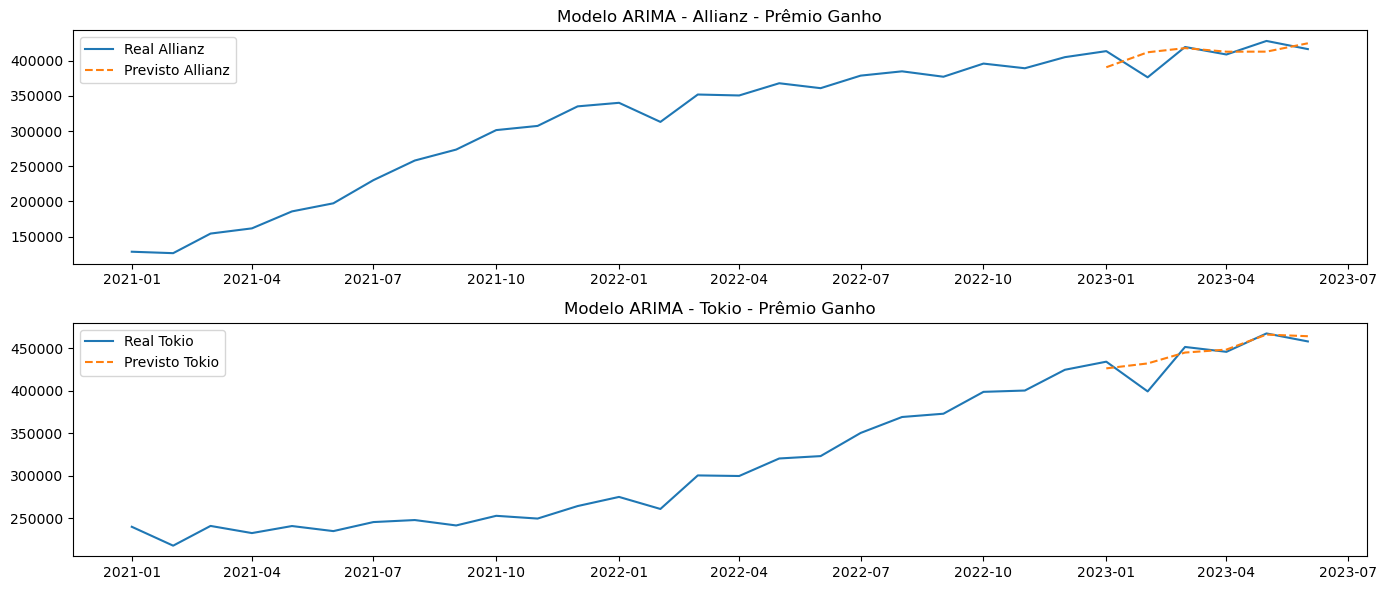

In [211]:
p_allianz = 11 # Ordem autorregressiva
d_allianz = 1 # Ordem de diferenciação
q_allianz = 2 # Ordem da média móvel
p_tokyo = 11 # Ordem autorregressiva
d_tokyo = 1 # Ordem de diferenciação
q_tokyo = 6 # Ordem da média móvel
mse_allianz, true_values_allianz, predictions_allianz = train_test_arima(df_allianz_comp,
                                    'Prêmio Ganho', p_allianz, d_allianz, q_allianz)
mse_tokio, true_values_tokio, predictions_tokio = train_test_arima(df_tokio_comp,
'Prêmio Ganho', p_tokyo, d_tokyo, q_tokyo)
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(df_allianz_comp['Mês'], df_allianz_comp['Prêmio Ganho'], label='Real Allianz')
plt.plot(true_values_allianz['Mês'], predictions_allianz, label='Previsto Allianz', linestyle='dashed')
plt.title('Modelo ARIMA - Allianz - Prêmio Ganho')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df_tokio_comp['Mês'], df_tokio_comp['Prêmio Ganho'], label='Real Tokio')
plt.plot(true_values_allianz['Mês'], predictions_tokio, label='Previsto Tokio', linestyle='dashed')
plt.title('Modelo ARIMA - Tokio - Prêmio Ganho')
plt.legend()
plt.tight_layout()

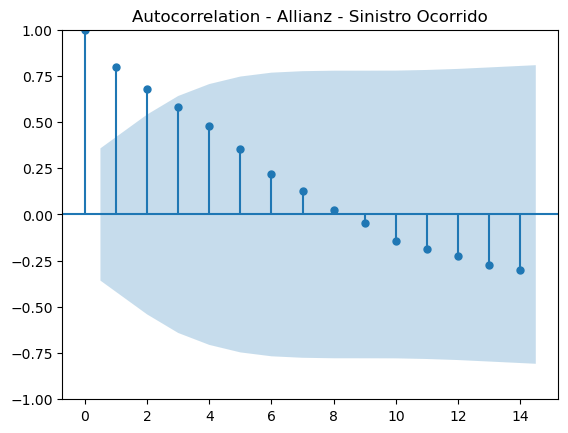

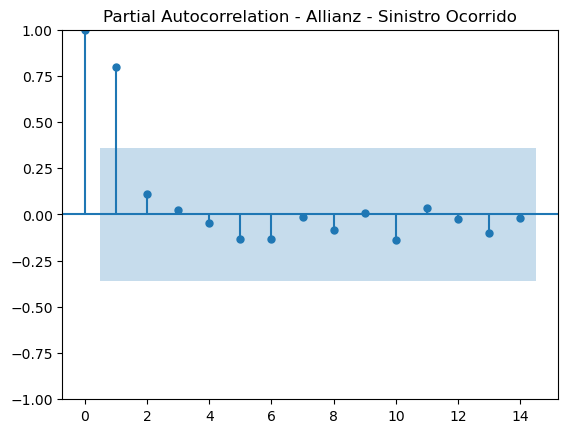

In [212]:
def find_order(data, target_col):
    acf_plot = plot_acf(data[target_col], lags=14,title='Autocorrelation - Allianz - Sinistro Ocorrido')
    pacf_plot = plot_pacf(data[target_col], lags=14,
    title='Partial Autocorrelation - Allianz - Sinistro Ocorrido')
find_order(df_allianz_comp, 'Sinistro Ocorrido')

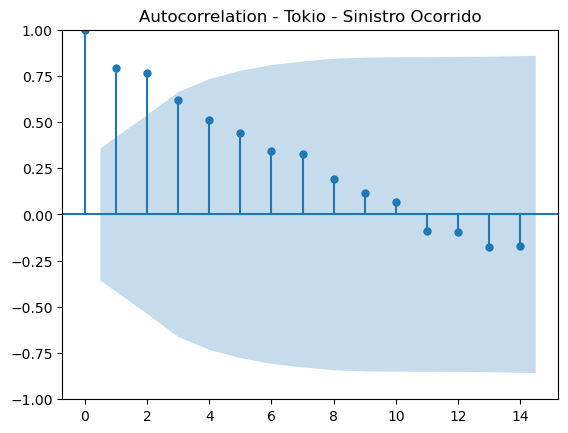

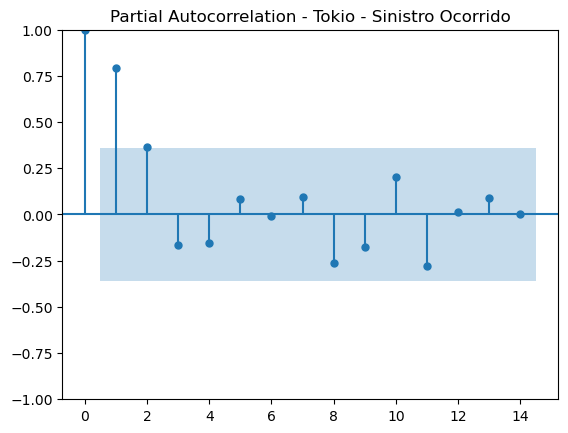

In [213]:
def find_order(data, target_col):
    acf_plot = plot_acf(data[target_col], lags=14,title='Autocorrelation - Tokio - Sinistro Ocorrido')
    pacf_plot = plot_pacf(data[target_col], lags=14,
    title='Partial Autocorrelation - Tokio - Sinistro Ocorrido')
find_order(df_tokio_comp, 'Sinistro Ocorrido')


In [214]:
def train_test_arima(data, target_col, p, d, q):
    train, test = train_test_split(data, test_size=0.2, shuffle=False)
    model = ARIMA(train[target_col], order=(p, d, q))
    fitted_model = model.fit()
    predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
    mse = mean_squared_error(test[target_col], predictions)
    return mse, test, predictions

C:\Users\R5564655\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\R5564655\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\R5564655\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\R5564655\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning i

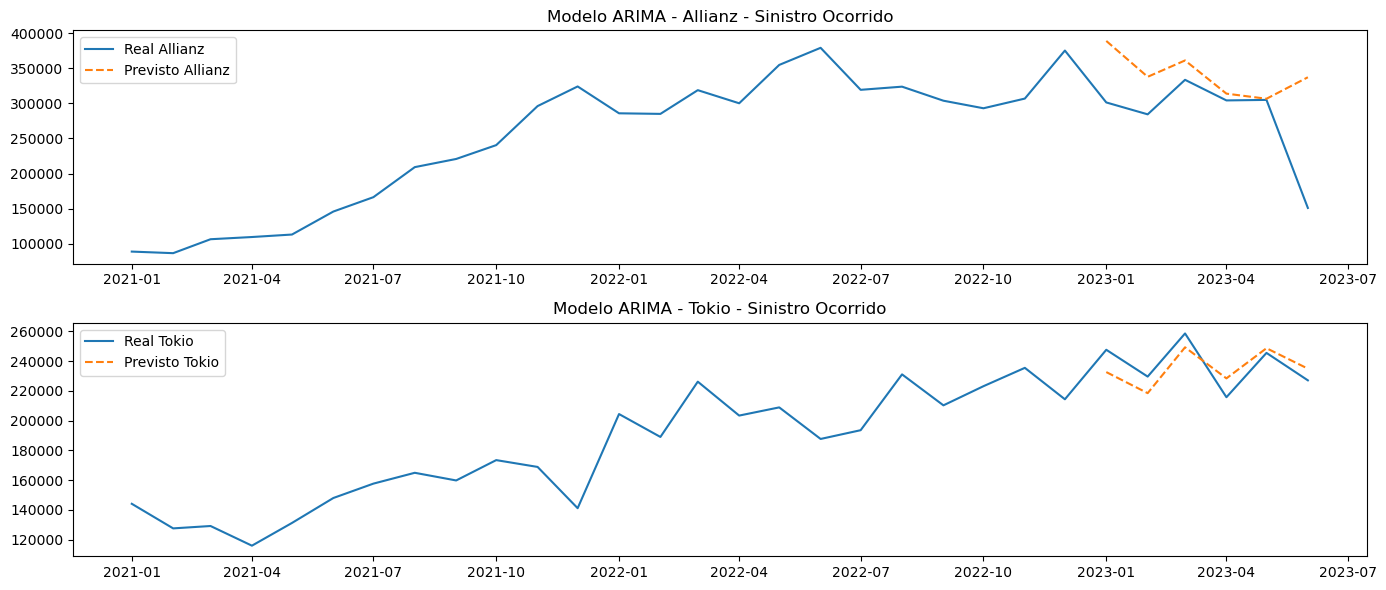

In [215]:
p_allianz = 8 # Ordem autorregressiva
d_allianz = 3 # Ordem de diferenciação
q_allianz = 3 # Ordem da média móvel
p_tokyo = 11 # Ordem autorregressiva
d_tokyo = 1 # Ordem de diferenciação
q_tokyo = 6 # Ordem da média móvel
mse_allianz, true_values_allianz, predictions_allianz = train_test_arima(df_allianz_comp,
'Sinistro Ocorrido', p_allianz, d_allianz, q_allianz)
mse_tokio, true_values_tokio, predictions_tokio = train_test_arima(df_tokio_comp,
'Sinistro Ocorrido', p_tokyo, d_tokyo, q_tokyo)
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(df_allianz_comp['Mês'], df_allianz_comp['Sinistro Ocorrido'], label='Real Allianz')
plt.plot(true_values_allianz['Mês'], predictions_allianz, label='Previsto Allianz', linestyle='dashed')
plt.title('Modelo ARIMA - Allianz - Sinistro Ocorrido')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df_tokio_comp['Mês'], df_tokio_comp['Sinistro Ocorrido'], label='Real Tokio')
plt.plot(true_values_allianz['Mês'], predictions_tokio, label='Previsto Tokio', linestyle='dashed')
plt.title('Modelo ARIMA - Tokio - Sinistro Ocorrido')
plt.legend()
plt.tight_layout()